In [73]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from konlpy.tag import Kkma
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import time
import urllib
import csv
import re

In [74]:
# ----------------------------------------------------------
# 소스작성 : 정윤혁, 박채원
# 소스내용 : 국민청원 게시물 추천순으로 20page(300개)의 URL주소를 배열에 저장
# ----------------------------------------------------------

url = []
page = 20
# 한 페이지당 15개의 게시물로 상위 300개의 제목을 가져온다.

for i in range(1,page+1):  
    # 추천순 URL 세팅
    code = "&wscckey=65d7620797c53a62_1608392924" #매번 update(홈페이지 url 참고)
    html = urlopen("https://www1.president.go.kr/petitions/best?page="+str(i)+code)
    # html 언어로 파싱
    soup = BeautifulSoup(html,'html.parser')
    
    # 전체글목록(body)
    for j in soup.findAll('div',{'class':'bl_body'}):
        # 각 게시물(subject)
        for k in j.findAll('div',{'class':'bl_subject'}):
            # a href를 검색하여 각 게시물의 상세 URL 파싱
            a = k.find('a')['href']
            # 배열에 URL 저장
            if bool(re.match('/[a-z].*/[0-9].*\?navigation=best',a)):
                url.append(a)
                
print(len(url))

300


In [ ]:
# 제목을 담을 배열 선언
title = []
join = []
kategorie = []
text = []

# 위에서 담은 URL개수만큼 for문 수행
for i in range(0, len(url)):
    # URL 주소 조립
    html = urlopen("https://www1.president.go.kr"+str(url[i]))
    # html 언어로 파싱
    soup = BeautifulSoup(html, "html.parser")
    
    
    # 배열에 게시물 제목 저장
    for j in soup.findAll('h3',{'class':'petitionsView_title'}):
        title.append(j.text)
        
    #카테고리명 저장
    for j in soup.findAll('ul',{'class':'petitionsView_info_list'}):
        kategorie.append(j.find('li').text[4:])
        
    #청원 참여 인원 저장
    for j in soup.findAll('span',{'class':'counter'}):
        join.append(j.text)
    
    #본문 내용 저장
    for j in soup.findAll('div',{'class':'View_write'}):
        text.append(j.text)  
    while '' in text:
        text.remove('')

In [ ]:
df=pd.DataFrame({'title':title,'kategorie':kategorie,'join':join,'text':text})

#본문 길이를 나타내는 항목 추가
df['text_length']=df['text'].apply(len)

In [ ]:
print(len(title))
print(len(kategorie))
print(len(join))
print(len(text))
title

In [ ]:
df.head()

In [ ]:
#csv 파일로 저장
df.to_csv('C:\damin_exam\project/project_dataset.csv', encoding='utf-8-sig')

In [75]:
# ----------------------------------------------------------
# 소스작성 : 이다민
# 소스내용 : 데이터 전처리(1/2)
# ----------------------------------------------------------

#저장한 dataset 불러오기
data=pd.read_csv('C:\damin_exam\project/project_dataset.csv', encoding='utf-8-sig')
data_text=data['text']
hangul = re.compile('[^ ㄱ-ㅣ가-힣 a-z A-Z 0-9]+') #특수 문자 제거를 위해 필요한 문자로 정규식 작성

data_text=[hangul.sub(' ',x) for x in data_text].copy()
data['data_preprocessing']=[hangul.sub(' ',x) for x in data_text].copy()

In [76]:
okt=Okt()

In [77]:
# ----------------------------------------------------------
# 소스작성 : 박채원
# 소스내용 : 데이터 전처리(2/2)
# ----------------------------------------------------------

#형태소 단위로 나눠줌
clean_words=[]
doc=[]
temp=[]

for i in range(0, len(data_text)):
    doc.append(data_text[i])
    for i, document in enumerate(doc):
        for word in okt.pos(document, stem=True): #어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사만 추출
                clean_words.append(word[0])
        temp.append([clean_words])
        clean_words=[]
    doc=[]
        
for i in range(0, len(data_text)):
    data_text[i]=temp[i]
    print(data_text[i])
    

[['저희', '아들', '학교폭력', '지금', '의식', '중환자실', '눕다', '아이', '고등학교', '학년', '재학', '이다', '아빠', '밖', '보기', '날', '이다', '몸', '살기', '있다', '그날', '따르다', '날씨', '춥다', '집', '있다', '하다', '제', '밖', '볼일', '끝내다', '집', '온', '시각', '오후', '아들', '집', '없다', '전화', '걸다', '목소리', '매우', '어둡다', '숨', '차오르다', '얘기', '하다', '친구', '하다', '얘기', '있다', '부르다', '금방', '들어가다', '매우', '어둡다', '힘', '들다', '하다', '아들', '마지막', '목소리', '이다', '연락', '받다', '가해', '학생', '명', '딸아이', '문자', '오빠', '나하', '스파링', '하다', '맞다', '기절', '하다', '하다', '전화', '걸다', '저희', '아들', '있다', '곳', '확인', '하다', '가해', '학생', '상황', '물어보다', '자다', '같다', '하다', '말', '안되다', '운동', '하다', '아이', '아니다', '복싱', '하다', '모르다', '아이', '키', '이', '넘다', '몸무게', '키로', '안되다', '겁', '많다', '몸', '아이', '이다', '이렇다', '우리', '아들', '스파링', '가능하다', '순간', '생각', '들다', '가해', '학생', '아들', '두다', '도망가다', '달래다', '아줌마', '갈다', '때', '기다리다', '달라', '사정', '하다', '신고', '도착', '하다', '아파트', '내', '관인', '커뮤니티', '체육', '시설', '안', '어른', '그렇다', '벌어지다', '처음', '아들', '보다', '때', '힘', '축', '늘어지다', '숨', '고르다', '내쉬다', '못', '동공', '빛', '반응', '없다', 

In [78]:
# 불용어 제거 (stopwords file 필요)
stopwords = []
for line in open('C:\damin_exam\project/stopword_kor.txt', 'r', encoding='utf-8'):
    stopwords.append(line.split()[0])
    
for i in range(0, len(data_text)):
    for j in range(0,len(data_text[i])):
        data_text[i][j] = [x for x in data_text[i][j] if x not in stopwords]
data_text=data_text.copy()

 
def stopwords(text):
    tokens = text.split(' ')
    stopwords = []
    for line in open('C:\damin_exam\project/stopword_kor.txt',  'r', encoding='utf-8'):
        stopwords.append(line.split()[0])
    resultStopwords = [w for w in tokens if not w in stopwords]
    return ' '.join(resultStopwords)

In [79]:
# ----------------------------------------------------------
# 소스작성 : 이다민
# 소스내용 : 데이터 시각화(plot, Word cloud)
# ----------------------------------------------------------

#전체 단어 list 생성
word_total=[]
word_dic={}
word_cnt=[]

for i in data_text :
    word_total+=i[0]

#단어 빈도수 count를 위해 dictionary 생성
for i in range(0,len(word_total)):
    word_dic.setdefault(str(word_total[i]),word_total.count(str(word_total[i])))

print(len(word_dic))


9530


In [115]:
#빈도수대로 정렬하기
temp_d=sorted(word_dic.items(),key=lambda x:x[1],reverse=True)

sort_d={}

for k,v in temp_d[:40] :   #상위 40개의 단어 그래프 시각화
    sort_d[k]=v

sort_d

{'코로나': 356,
 '검찰': 258,
 '아동': 244,
 '사건': 210,
 '정부': 209,
 '가족': 193,
 '병원': 189,
 '검사': 178,
 '지역': 166,
 '이유': 162,
 '대통령': 162,
 '학교': 159,
 '보호': 155,
 '곳': 154,
 '법': 153,
 '처벌': 151,
 '장관': 151,
 '확진자': 150,
 '대한민국': 148,
 '조치': 148,
 '국가': 148,
 '못': 143,
 '아들': 141,
 '모든': 140,
 '발생': 139,
 '운영': 133,
 '단계': 133,
 '방역': 132,
 '시민': 127,
 '시설': 125,
 '정책': 125,
 '보육': 125,
 '교사': 123,
 '상태': 119,
 '분': 118,
 '확인': 117,
 '조사': 117,
 '학생': 110,
 '수사': 104,
 '개혁': 104}

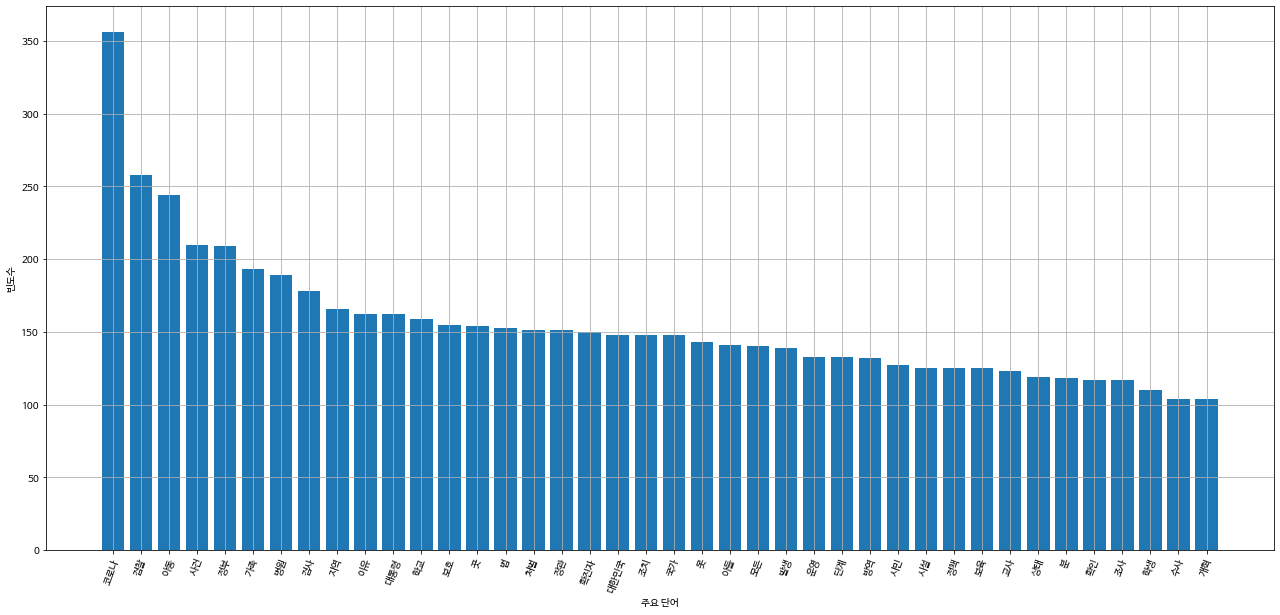

In [116]:
font_path='C:\damin_exam\project/NanumBarunGothic.ttf'

def showGraph(wordInfo): #시각화를 위한 메서드 작성
    
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
    plt.rcParams["figure.figsize"] = (22,10)
    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()
    
showGraph(sort_d)

In [9]:
mask = np.array(Image.open("C:\damin_exam\project/mask_man.png"))

wordcloud=WordCloud()
wordcloud=WordCloud(
    font_path=font_path,
    background_color="white",
    width=1000,
    height=1000,
    max_words=150,
    mask=mask)

wordcloud=wordcloud.generate_from_frequencies(word_dic)

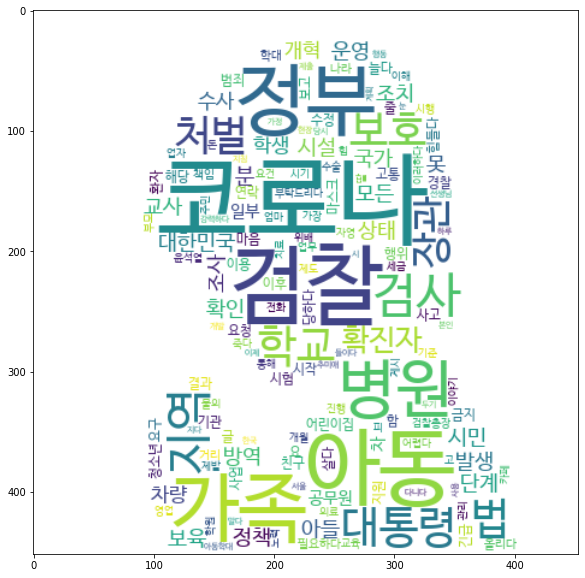

In [10]:
#array=wordcloud.to_array()
fig=plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()
fig.savefig('C:\damin_exam\project/word_cloud.png')

In [62]:
# ----------------------------------------------------------
# 소스작성 : 박채원
# 소스내용 : TF-IDF 로 중요도 순으로 상위 5개의 키워드를 구함 
# ----------------------------------------------------------

from math import log10

global data_text

def f(t, d):
    return d.count(t) # 문서 d에서의 단어 t의 총 빈도 수

def tf(t, d):
    return 0.5 + 0.5 *f(t,d)/max([f(w,d) for w in d])
    # 문서의 길이에 따라 단어의 빈도 값을 조정해줌

def idf(t, AD):
    numerator = 300 # 총 문서의 수  
    denominator = 0
    
    for i in range(0, len(AD)) :
        if t in AD[i][0]:
            denominator = denominator + 1
    # 특정 단어 t가 등장한 문서의 수
    
    return log10(numerator/denominator)

def tfidf(t, d, AD):
    return tf(t,d)*idf(t, AD)

def tfidfScorer(AD):
    result = []
    for i in range(0, len(AD)):
        D = AD[i]
        for d in D:
            result.append([(t, tfidf(t, d, AD)) for t in d])
    return result

In [63]:
data_title=data['title']
keywords=[]

for i, doc in enumerate(tfidfScorer(data_text)):
    doc = list(set(doc))                        # 중복 단어 제거
    doc.sort(key=lambda x:x[1], reverse=True) # idf 높은 순으로 정렬
    doc = [x[0] for x in doc]                  # 단어만 출력
    keywords.append(doc[:5])                    # 상위 5개 단어만 저장

In [67]:
x = int(input('키워드를 알고 싶은 문서 번호를 입력하세요 : '))

print('청원 제목 : ', data_title[x] )
print('키워드 : ', keywords[x])


키워드를 알고 싶은 문서 번호를 입력하세요 : 17
청원 제목 :  문재인 대통령 사저 크기를 6평으로 제한해주십시오
키워드 :  ['부부', '질문', '발언', '변창흠', '크기']


In [9]:
# ----------------------------------------------------------
# 소스작성 : 정윤혁
# 소스내용 : 카테고리 분류
# ----------------------------------------------------------
# 불용어 제거 메소드 호출
data['data_stopwords'] = data['data_preprocessing'].apply(stopwords)
data.head()

,Unnamed: 0,title,kategorie,join,text,text_length,data_preprocessing,data_stopwords
0,0,잔인하고도 무서운 학교폭력으로 우리아들의 인생이 망가졌습니다.,기타,"295,087",\n\t\t\t\t\t\t\t\t\t\t저희 아들은 학교폭력으로 지금 의식이 없이...,2594,저희 아들은 학교폭력으로 지금 의식이 없이 중환자실에 누워있습니다 저희아이는 ...,아들은 학교폭력으로 의식이 없이 중환자실에 누워있습니다 저희아이는 고등학교 1...
1,1,"병폐의 고리, 검찰 기자단을 해체시켜주십시오!",기타,"291,873","\n\t\t\t\t\t\t\t\t\t\t병폐의 고리, 검찰 기자단을 해체시켜주십시오...",1367,병폐의 고리 검찰 기자단을 해체시켜주십시오 무소불위의 검찰 그런 검찰 뒤에는 특...,병폐의 고리 검찰 기자단을 해체시켜주십시오 무소불위의 검찰 검찰 뒤에는 특권을 ...
2,2,검찰총장 윤석열 해임과 함께 철저한 수사를 통해 엄중처벌 받아야 합니다.,정치개혁,"270,510",\n\t\t\t\t\t\t\t\t\t\t- 다음을 강력히 청원하는 바입니다.\n\r...,1839,다음을 강력히 청원하는 바입니다 검찰총장 윤석열은 이미 천하에 밝혀진 근거로 ...,다음을 강력히 청원하는 바입니다 검찰총장 윤석열은 이미 천하에 밝혀진 절차대로...
3,3,윤석열 검찰총장 징계철회 및 해임반대,정치개혁,"265,953",\n\t\t\t\t\t\t\t\t\t\t추미애 법무부장관이 추진하고 있는 윤석열 검...,276,추미애 법무부장관이 추진하고 있는 윤석열 검찰총장에 대한 징계절차와 징계위 결정 ...,추미애 법무부장관이 추진하고 있는 윤석열 검찰총장에 징계절차와 징계위 결정 예상되...
4,4,횡단보도 보행 중 음주운전자의 사고로 28살 청년이 사망했습니다.,안전/환경,"236,276",\n\t\t\t\t\t\t\t\t\t\t2020년 11월 6일 저녁 \r\n28살의...,942,2020년 11월 6일 저녁 28살의 젊고 유망한 청년이 횡단보도의 초록색 신호...,2020년 11월 6일 저녁 28살의 젊고 유망한 청년이 횡단보도의 초록색 신호...


In [10]:
# 300개의 카테고리 분류 확인
kategorie_view = data['kategorie'].value_counts()
kategorie_view

정치개혁           47
보건복지           40
육아/교육          34
교통/건축/국토       29
안전/환경          27
기타             23
행정             21
인권/성평등         18
반려동물           14
문화/예술/체육/언론    10
경제민주화           9
미래              8
일자리             7
외교/통일/국방        6
저출산/고령화대책       3
농산어촌            3
성장동력            1
Name: kategorie, dtype: int64

In [11]:
# 예측한 카테고리를 저장할 컬럼 추가
data['kategorie_pred'] = data['kategorie'].copy()
data.shape

(300, 9)

In [12]:
# 300개의 문서중에 80%는 학습데이터, 20%는 테스트데이터로 분류하기
splitCount = int(data.shape[0] * 0.8)
splitCount

# 학습데이터 80% 선정
data_train = data[:splitCount].copy()
data_train.shape

# 테스트데이터 20% 선정
data_test = data[splitCount:].copy()
data_test.shape

(60, 9)

In [13]:
# 문서 -> 단어로 토큰화
vectorizer = CountVectorizer(analyzer = 'word', # 단어 단위로 벡터화
                             tokenizer = None, # 토크나이저를 지정 안함
                             preprocessor = None, # 전처리 이미하였으므로 안함
                             stop_words = None, # 불용어 이미하였으므로 안함
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
                             max_features = 1667 # 만들 피처의 수, 단어의 수가 된다.
                            )

In [14]:
#학습데이터에 대하여, 문서 -> 단어 토큰화
train_feature_vector = vectorizer.fit_transform(data_train['data_stopwords'])
train_feature_vector.shape

(240, 1667)

In [15]:
#테스트데이터에 대하여, 문서 -> 단어 토큰화
test_feature_vector = vectorizer.fit_transform(data_test['data_stopwords'])
test_feature_vector.shape

(60, 1667)

In [16]:
#토큰화된 단어 확인
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1667


['10', '10원도', '11월', '12월', '14일', '15', '15년', '15일', '19', '19로']

## 랜덤포레스트로 학습하기

In [45]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [46]:
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
train_feature_tfidf.shape

(240, 1667)

In [47]:
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
test_feature_tfidf.shape

(60, 1667)

In [48]:
y_label = data_train['kategorie']
len(y_label)

240

In [49]:
# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(n_jobs=-1, random_state=2018)

In [50]:
# 학습하기
forest = forest.fit(train_feature_tfidf, y_label)

## 학습된 결과로 테스트데이터 예측

In [51]:
y_pred = forest.predict(test_feature_vector)
y_pred[:3]
# 예측 후 결과 3개 출력

array(['정치개혁', '정치개혁', '육아/교육'], dtype=object)

In [52]:
data_test[:3]

,Unnamed: 0,title,kategorie,join,text,text_length,data_preprocessing,data_stopwords,kategorie_pred,result
240,240,"동물보호법 강화를 청원합니다.(애니멀봐 개농장주,동물학대범 강호순 등)",반려동물,"1,314",\n\t\t\t\t\t\t\t\t\t\t동물보호법 강화\n\r\n현재 우리나라는 반...,1994,동물보호법 강화 현재 우리나라는 반려동물 양육 인구 1천500만 시대로 반려동물을...,동물보호법 강화 우리나라는 반려동물 양육 인구 1천500만 시대로 반려동물을 가족...,정치개혁,0
241,241,"< 반복되는 마녀사냥과 색깔론을 끝낼 수 있도록, 국가보안법 폐지에 청와대와 입법부...",정치개혁,"1,312",\n\t\t\t\t\t\t\t\t\t\t< 반복되는 마녀사냥과 색깔론을 끝낼 수 있...,3094,반복되는 마녀사냥과 색깔론을 끝낼 수 있도록 국가보안법 폐지에 청와대와 입법부...,반복되는 마녀사냥과 색깔론을 끝낼 있도록 국가보안법 폐지에 청와대와 입법부 나...,정치개혁,1
242,242,대한송유관공사 **지사를 고발합니다,안전/환경,"1,309",\n\t\t\t\t\t\t\t\t\t\t대한송유관공사 **지사의 안전사고를\r\n방...,751,대한송유관공사 지사의 안전사고를 방관하고있는 태도에 대해 고발합니다 공사의 내부...,대한송유관공사 지사의 안전사고를 방관하고있는 태도에 고발합니다 공사의 내부망 전...,육아/교육,0


In [41]:
data_test['kategorie_pred'] = y_pred

In [42]:
# 예측에 성공하면 result 컬럼이 1, 실패하면 0
data_test['result'] = 0
data_test['result'] = (data_test['kategorie'] == data_test['kategorie_pred'] ) == 1
data_test['result'] = data_test['result'].astype(int)
data_test.head(3)

,Unnamed: 0,title,kategorie,join,text,text_length,data_preprocessing,data_stopwords,kategorie_pred,result
240,240,"동물보호법 강화를 청원합니다.(애니멀봐 개농장주,동물학대범 강호순 등)",반려동물,"1,314",\n\t\t\t\t\t\t\t\t\t\t동물보호법 강화\n\r\n현재 우리나라는 반...,1994,동물보호법 강화 현재 우리나라는 반려동물 양육 인구 1천500만 시대로 반려동물을...,동물보호법 강화 우리나라는 반려동물 양육 인구 1천500만 시대로 반려동물을 가족...,정치개혁,0
241,241,"< 반복되는 마녀사냥과 색깔론을 끝낼 수 있도록, 국가보안법 폐지에 청와대와 입법부...",정치개혁,"1,312",\n\t\t\t\t\t\t\t\t\t\t< 반복되는 마녀사냥과 색깔론을 끝낼 수 있...,3094,반복되는 마녀사냥과 색깔론을 끝낼 수 있도록 국가보안법 폐지에 청와대와 입법부...,반복되는 마녀사냥과 색깔론을 끝낼 있도록 국가보안법 폐지에 청와대와 입법부 나...,정치개혁,1
242,242,대한송유관공사 **지사를 고발합니다,안전/환경,"1,309",\n\t\t\t\t\t\t\t\t\t\t대한송유관공사 **지사의 안전사고를\r\n방...,751,대한송유관공사 지사의 안전사고를 방관하고있는 태도에 대해 고발합니다 공사의 내부...,대한송유관공사 지사의 안전사고를 방관하고있는 태도에 고발합니다 공사의 내부망 전...,육아/교육,0


In [55]:
data_test[:]

,Unnamed: 0,title,kategorie,join,text,text_length,data_preprocessing,data_stopwords,kategorie_pred,result
240,240,"동물보호법 강화를 청원합니다.(애니멀봐 개농장주,동물학대범 강호순 등)",반려동물,"1,314",\n\t\t\t\t\t\t\t\t\t\t동물보호법 강화\n\r\n현재 우리나라는 반...,1994,동물보호법 강화 현재 우리나라는 반려동물 양육 인구 1천500만 시대로 반려동물을...,동물보호법 강화 우리나라는 반려동물 양육 인구 1천500만 시대로 반려동물을 가족...,정치개혁,0
241,241,"< 반복되는 마녀사냥과 색깔론을 끝낼 수 있도록, 국가보안법 폐지에 청와대와 입법부...",정치개혁,"1,312",\n\t\t\t\t\t\t\t\t\t\t< 반복되는 마녀사냥과 색깔론을 끝낼 수 있...,3094,반복되는 마녀사냥과 색깔론을 끝낼 수 있도록 국가보안법 폐지에 청와대와 입법부...,반복되는 마녀사냥과 색깔론을 끝낼 있도록 국가보안법 폐지에 청와대와 입법부 나...,정치개혁,1
242,242,대한송유관공사 **지사를 고발합니다,안전/환경,"1,309",\n\t\t\t\t\t\t\t\t\t\t대한송유관공사 **지사의 안전사고를\r\n방...,751,대한송유관공사 지사의 안전사고를 방관하고있는 태도에 대해 고발합니다 공사의 내부...,대한송유관공사 지사의 안전사고를 방관하고있는 태도에 고발합니다 공사의 내부망 전...,육아/교육,0
243,243,부동산 규제 정책 검토 시 동별 적용 바랍니다.,교통/건축/국토,"1,307",\n\t\t\t\t\t\t\t\t\t\t존경하는 문재인 대통령님\n\r\n전 국민의...,1456,존경하는 문재인 대통령님 전 국민의 화합과 통합을 위해 불철주야 노력해 주셔서 감...,존경하는 문재인 대통령님 국민의 화합과 통합을 불철주야 노력해 주셔서 감사드립니다...,정치개혁,0
244,244,카페/음식점 형평성에 맞지 않는 비현실적인 규제 철회하라!!,보건복지,"1,299",\n\t\t\t\t\t\t\t\t\t\t카페/음식점 형평성에 맞지 않는 비현실적인 ...,942,카페 음식점 형평성에 맞지 않는 비현실적인 규제 철회하라 카페 홀 영업중지는 사실...,카페 음식점 형평성에 맞지 않는 비현실적인 규제 철회하라 카페 홀 영업중지는 사실...,육아/교육,0
245,245,피눈물로 호소합니다,보건복지,"1,297",\n\t\t\t\t\t\t\t\t\t\t대통령님께\n\r\n의료전문검사님이 담당해야...,932,대통령님께 의료전문검사님이 담당해야만 밝혀지는 사건입니다 의사자격증 가진 검...,대통령님께 의료전문검사님이 담당해야만 밝혀지는 사건입니다 의사자격증 가진 검...,정치개혁,0
246,246,전국민 코로나19 진단검사 실시해야 한다고 생각합니다.,보건복지,"1,281",\n\t\t\t\t\t\t\t\t\t\t올해 발생한 코로나 19 바이러스로 많은 사...,703,올해 발생한 코로나 19 바이러스로 많은 사상자가 나오고 있습니다 현재 백신과 치...,올해 발생한 코로나 19 바이러스로 많은 사상자가 나오고 있습니다 백신과 치료제 ...,정치개혁,0
247,247,정부는 사회적 거리두기를 3단계로 격상하여 이 고통을 끝내주십시오.,미래,"1,263",\n\t\t\t\t\t\t\t\t\t\t대한민국의 한 구성원입니다. 오늘 저는 대한...,907,대한민국의 한 구성원입니다 오늘 저는 대한민국 정부를 향해 청원을 올리려 합니다...,대한민국의 구성원입니다 오늘 저는 대한민국 정부를 향해 청원을 올리려 합니다 정...,반려동물,0
248,248,유치원 교사를 코로나부터 보호해주세요.,육아/교육,"1,262",\n\t\t\t\t\t\t\t\t\t\t코로나 확진자가 1000명을 육박하면서 거리...,828,코로나 확진자가 1000명을 육박하면서 거리두기 3단계 또한 논의되고 있습니다 3...,코로나 확진자가 1000명을 육박하면서 거리두기 3단계 논의되고 있습니다 3단계가...,정치개혁,0
249,249,"국민연금, 아무런 책임이 없는가?!",보건복지,"1,255","\n\t\t\t\t\t\t\t\t\t\t대한민국 국적을 가진 사람이라면, 의무적으로...",702,대한민국 국적을 가진 사람이라면 의무적으로 국민연금을 납부 하도록 되어있습니다 ...,대한민국 국적을 가진 사람이라면 의무적으로 국민연금을 납부 하도록 되어있습니다 ...,정치개혁,0


In [56]:
# 예측결과 확인
result = data_test['result'].value_counts()
result

0    57
1     3
Name: result, dtype: int64